# <center> Tree Models </center>

## **<font color="violet"> Decision Tree basics </font>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# use (%matplotlib inline) để thay cho (plt.show()) trong các phần show bên dưới
import seaborn as sns

# one-hot encoding:
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

In [2]:
# free thử model: h2o.ai & brightics.ai

In [3]:
iris_df = sns.load_dataset('iris')

In [4]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris_df.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

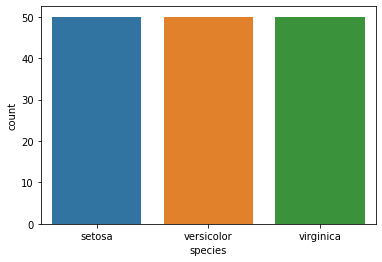

In [6]:
sns.countplot(data=iris_df, x='species')
plt.show()

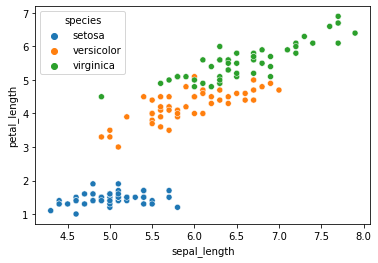

In [7]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species')
plt.show()

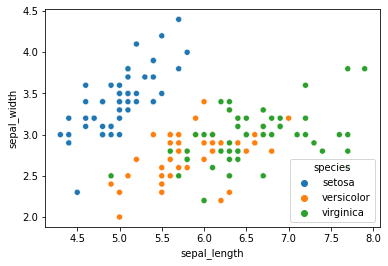

In [8]:
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='species')
plt.show()

# **<font color="blue"> One-hot-Encoding </font>**
- convert data from Categ into Nums

In [9]:
# from sklearn import preprocessing          ~        # from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.species.unique())                                     # create map_dictionary
iris_df.species = le.transform(iris_df.species)                      # map data
iris_df.species.unique()
# .map({'a':...,...}) - sử dụng cho data ít giá trị Unique

array([0, 1, 2])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris_df[['sepal_length','sepal_width']],
                                                   iris_df['species'],
                                                   test_size=0.2,
                                                   random_state=42)

In [12]:
### fit model:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.40      0.44      0.42         9
           2       0.55      0.55      0.55        11

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



- <font color="blue">--> thấy results chưa oke lắm, cần điều chỉnh lại parameters trong hàm **DecisionTreeClassifier()**</font>

In [14]:
### tuning (điều chỉnh):
tree = DecisionTreeClassifier(max_depth=5,                          # số tầng của cây
                             max_features=2)                        # số features định build: (iris_df[['sepal_length','sepal_width']])
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=2)

In [15]:
y_pred = tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.54      0.78      0.64         9
           2       0.75      0.55      0.63        11

    accuracy                           0.73        30
   macro avg       0.76      0.74      0.74        30
weighted avg       0.77      0.73      0.74        30



In [16]:
confusion_matrix(y_test, y_pred)

array([[9, 1, 0],
       [0, 7, 2],
       [0, 5, 6]], dtype=int64)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


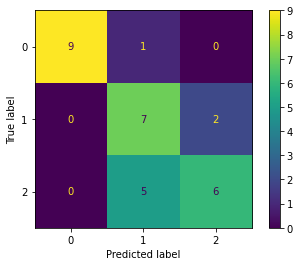

In [17]:
plot_confusion_matrix(tree, X_test, y_test)
plt.show()

#### **<font color="red"> - Entropy: </font>** thước đo độ hỗn loạn / nhiễu / (impurity) của Data, trong khoảng [0, 1] ~ <font color="yellow"> càng thấp càng tốt </font>
#### **<font color="red"> - Information Gain: </font>** đo độ giảm của Entropy, trong khoảng [0, (1 - 1/c)] ~ <font color="yellow"> càng cao càng tốt </font>
#### **<font color="red"> - Gini: </font>** thước đo mức độ phân loại sai
##### --> chỉ số: (criterion='entropy/gini', mặc định='gini') dùng để test xem có làm cho results of model better or not, nhưng tham số (criterion='') này hầu như không thay đổi results of model
![](https://dothanhblog.files.wordpress.com/2020/04/entropy_1.png)

In [18]:
### use criterion='' --> thấy f1-score thấp hơn cả kết quả dự đoán trên --> việc dùng (criterion) ở đây không OK.
tree_ = DecisionTreeClassifier(max_depth=5,                               # số tầng của cây
                             max_features=2,                              # số features định build: (iris_df[['sepal_length','sepal_width']])
                             criterion='entropy')                        
tree_.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=2)

In [19]:
y_pred = tree_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.42      0.89      0.57         9
           2       0.67      0.18      0.29        11

    accuracy                           0.60        30
   macro avg       0.70      0.62      0.58        30
weighted avg       0.70      0.60      0.57        30



In [20]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    X, y = X.values, y.values
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), 
               zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


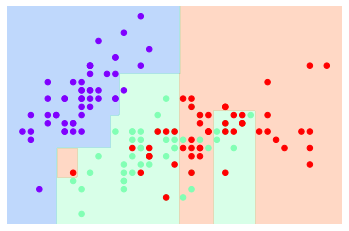

In [21]:
visualize_classifier(tree, iris_df[['sepal_length','sepal_width']], iris_df['species'])

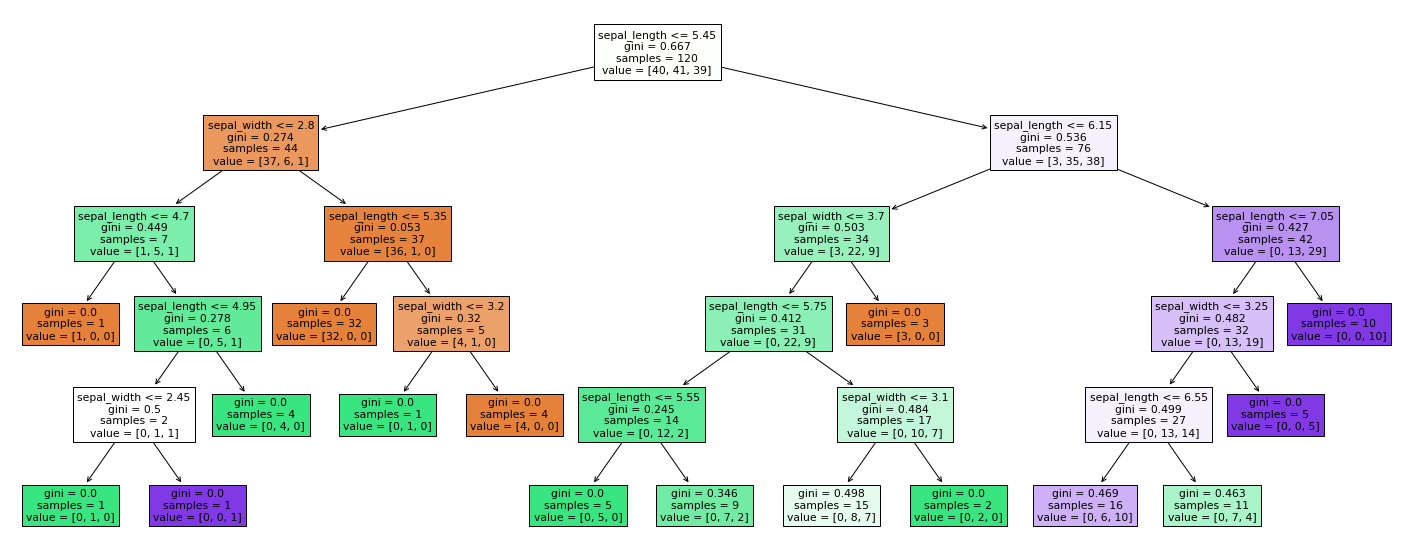

In [22]:
plt.figure(figsize = (25,10))
_ = plot_tree(tree, feature_names = X_train.columns, max_depth=5, filled = True)                  # tạo colours cho cây built: (filled = True)
plt.show()

## **<font color="violet"> Random Forest </font>**

![](https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg)

### <font color="lightgreen"> - Random Forest sử dụng được cho cả dạng Linear và non-Linear </font>
- **<font color="babypink"> Majoriry Voting: </font>** dùng cho non-Linear (khi 1 phần data được phân ra các trees, sau đó trả về các result thì xét xem **<font color="pink">Result nào xuất hiện nhiều nhất</font>** thì trả về làm **<font color="yellow">Final Result</font>**)
- **<font color="babypink"> Averaging: </font>** dùng cho Linear (khi 1 phần data được phân ra các trees, sau đó trả về các result thì tính **<font color="pink">trung bình các Result</font>** và trả về làm **<font color="yellow">Final Result</font>**)

### <font color="blue"> - **Random Forest** </font> <font color="lightblue">là 1 dạng của </font> <font color="green">**Ensemble Method**</font> <font color="lightblue"> (kết hợp nhiều model để đưa ra bài toán tối ưu) </font>
- <font color="babypink"> **Ensemble Method**: </font>
    - <font color="orange"> **Bagging:** </font> <font color="violet"> (vd: random forest): </font>
        - <font color="lightblue"> --> rule: lấy 1 phần data gốc (called </font> <font color="blue">**Boostrapping**</font> <font color="lightblue"> ) (vd: 80% data), phân về nhiều cây khác nhau (mỗi cây là 1 model (vd: có thể các cây đều cùng  model như Linear/Logicstic/Decision Tree/SVM..., hoặc mix các cây (mỗi cây 1 loại model))) --> </font> <font color="blue"> **Voting** </font> <font color="lightblue"> --> đưa ra </font> <font color="blue">**final Result** </font>
    - <font color="orange"> **Boosting:**</font> <font color="violet"> (vd: adaboost): </font>
        - <font color="lightblue"> --> rule: đưa data vào Classifier 1 (C1) --> đưa ra result, những kết quả đúng (OK), những kết quả sai thì tiếp tục đưa vào Classifier 2 (C2), (C3)... cho đến khi đưa ra kết quả Oke nhất --> </font> <font color="blue"> **final Result** </font>

- <font color="babypink">**Underfitting:**</font> training data chưa kĩ --> kết quả thấp
- <font color="babypink">**Overfitting:**</font> training data quá kĩ, f1-score có thể đạt 0.95 (cao), nhưng khi đưa test_data thì lại trả kết quả thấp (khoảng 0.45,...)

### <font color="orange">- Mức độ complex của Data:</font>
##### <font color="purple">**Linear --> non-Linear --> Ensemble --> kết hợp các Ensemble --> Deep Learning**</font>
- <font color="red">**Note:**</font> Deep Learning cần data lớn, sạch,... --> tuy nhiên trong các ngành như Finance sẽ không chuộng sử dụng Deep Learning vì nó là Blackbox (mình sẽ kb nó xử lý data như nào, nó chỉ đưa ra kết quả cuối cùng) --> do đó trong 1 số rủi ro, sẽ không biết nguyên nhân từ Features nào.

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred_1 = forest.predict(X_test)
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



In [26]:
### có thể thêm 1 số Parameters để tuning:
forest = RandomForestClassifier(
# max_feature          ~ sqrt(total_features) , thường thì 15 biến ~ 4 tầng
# max_ depth           ~ depends on max_feature, lấy log 2( max_feature)
# n_estimators         ~ decides the number of trees ~ ((total_features - max_feature) + 1)
# max_sample: (số lượng records muốn huấn luyện)
)
forest.fit(X_train, y_train)

RandomForestClassifier()

- tham khảo Parameters:
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## <font color="violet">**SVM:**</font> 
#### <font color="lightblue">(supported vector machine - chỉ sử dụng cho <font color="blue">**Binary Models**</font>)</font>
- <font color="pink">**SVM** không phải Trees, hỗ trợ cho cả những bài toán Linear và non-Linear</font>
- <font color="orange">**Decision Tree / Random Forest / SVM**</font> <font color="lightblue">đều có parameters (vd: <font color="red">class_weight</font>...) để xử lý balanced data & missing values (không cần sdung đến các hàm balanced/upsampling/downsampling...)</font>
#### <font color="red">- **Kernel:**</font> <font color="lightblue">(làm giảm tgian tính toán)</font>
- <font color="lightblue">(clf = SVC(kernel='linear/sigmoid/poly/rbf/precomputed')) - kernel mặc định là 'rbf':</font>
    - <font color="violet">**linear data:**</font> (<font color="lightblue">use (<font color="yellow">linear/sigmoid</font>)</font>
    - <font color="violet">**non-linear data:**</font> (<font color="lightblue">use (<font color="yellow">poly/**rbf**</font>), 1 số dạng use (<font color="yellow">precomputed</font>)</font>
- <font color="green">---> đi sâu hơn về thuật toán: https://machinelearningcoban.com/2017/04/22/kernelsmv/</font> --- AND --- https://mml-book.github.io/book/mml-book.pdf

In [27]:
iris_df.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

In [28]:
# replace: (chuyển Label về dạng Binary)
iris_df.species.gt(0) # greater than

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: species, Length: 150, dtype: bool

In [29]:
# ~ pyspark language:
iris_df.species.gt(0).astype(int).value_counts()
# ge >=
# eq ==
# ne !=
# lt <
# le <=

1    100
0     50
Name: species, dtype: int64

In [30]:
iris_df['target'] = iris_df.species.gt(0).astype(int)
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,target
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1
149,5.9,3.0,5.1,1.8,2,1


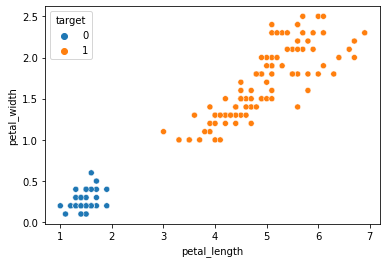

In [31]:
sns.scatterplot(data=iris_df,
               x='petal_length',
               y='petal_width',
               hue='target')
plt.show()

In [32]:
X, y = iris_df[['petal_length','petal_width']], iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
from sklearn.svm import SVC

In [34]:
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [35]:
y_pred_2 = clf.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        23

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [36]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=100, linewidth=1, facecolor='none', edgecolor='black');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


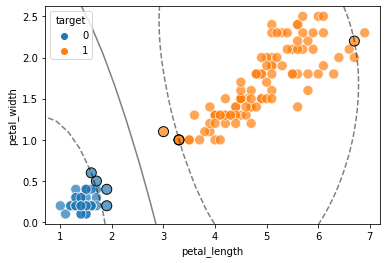

In [37]:
ax = sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='target', s=100, alpha=0.7, palette='tab10')
plot_svc_decision_function(clf, ax=ax, plot_support=True)
plt.show()
# hàm vẽ này chỉ dùng cho 2D, > 2D k dùng được
# những điểm có vòng tròn đen - trên hình là Support Vectors